# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_TO_BIKES = '/content/drive/MyDrive/GoIT/bikes_rent.csv'

In [4]:
df = pd.read_csv(PATH_TO_BIKES)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

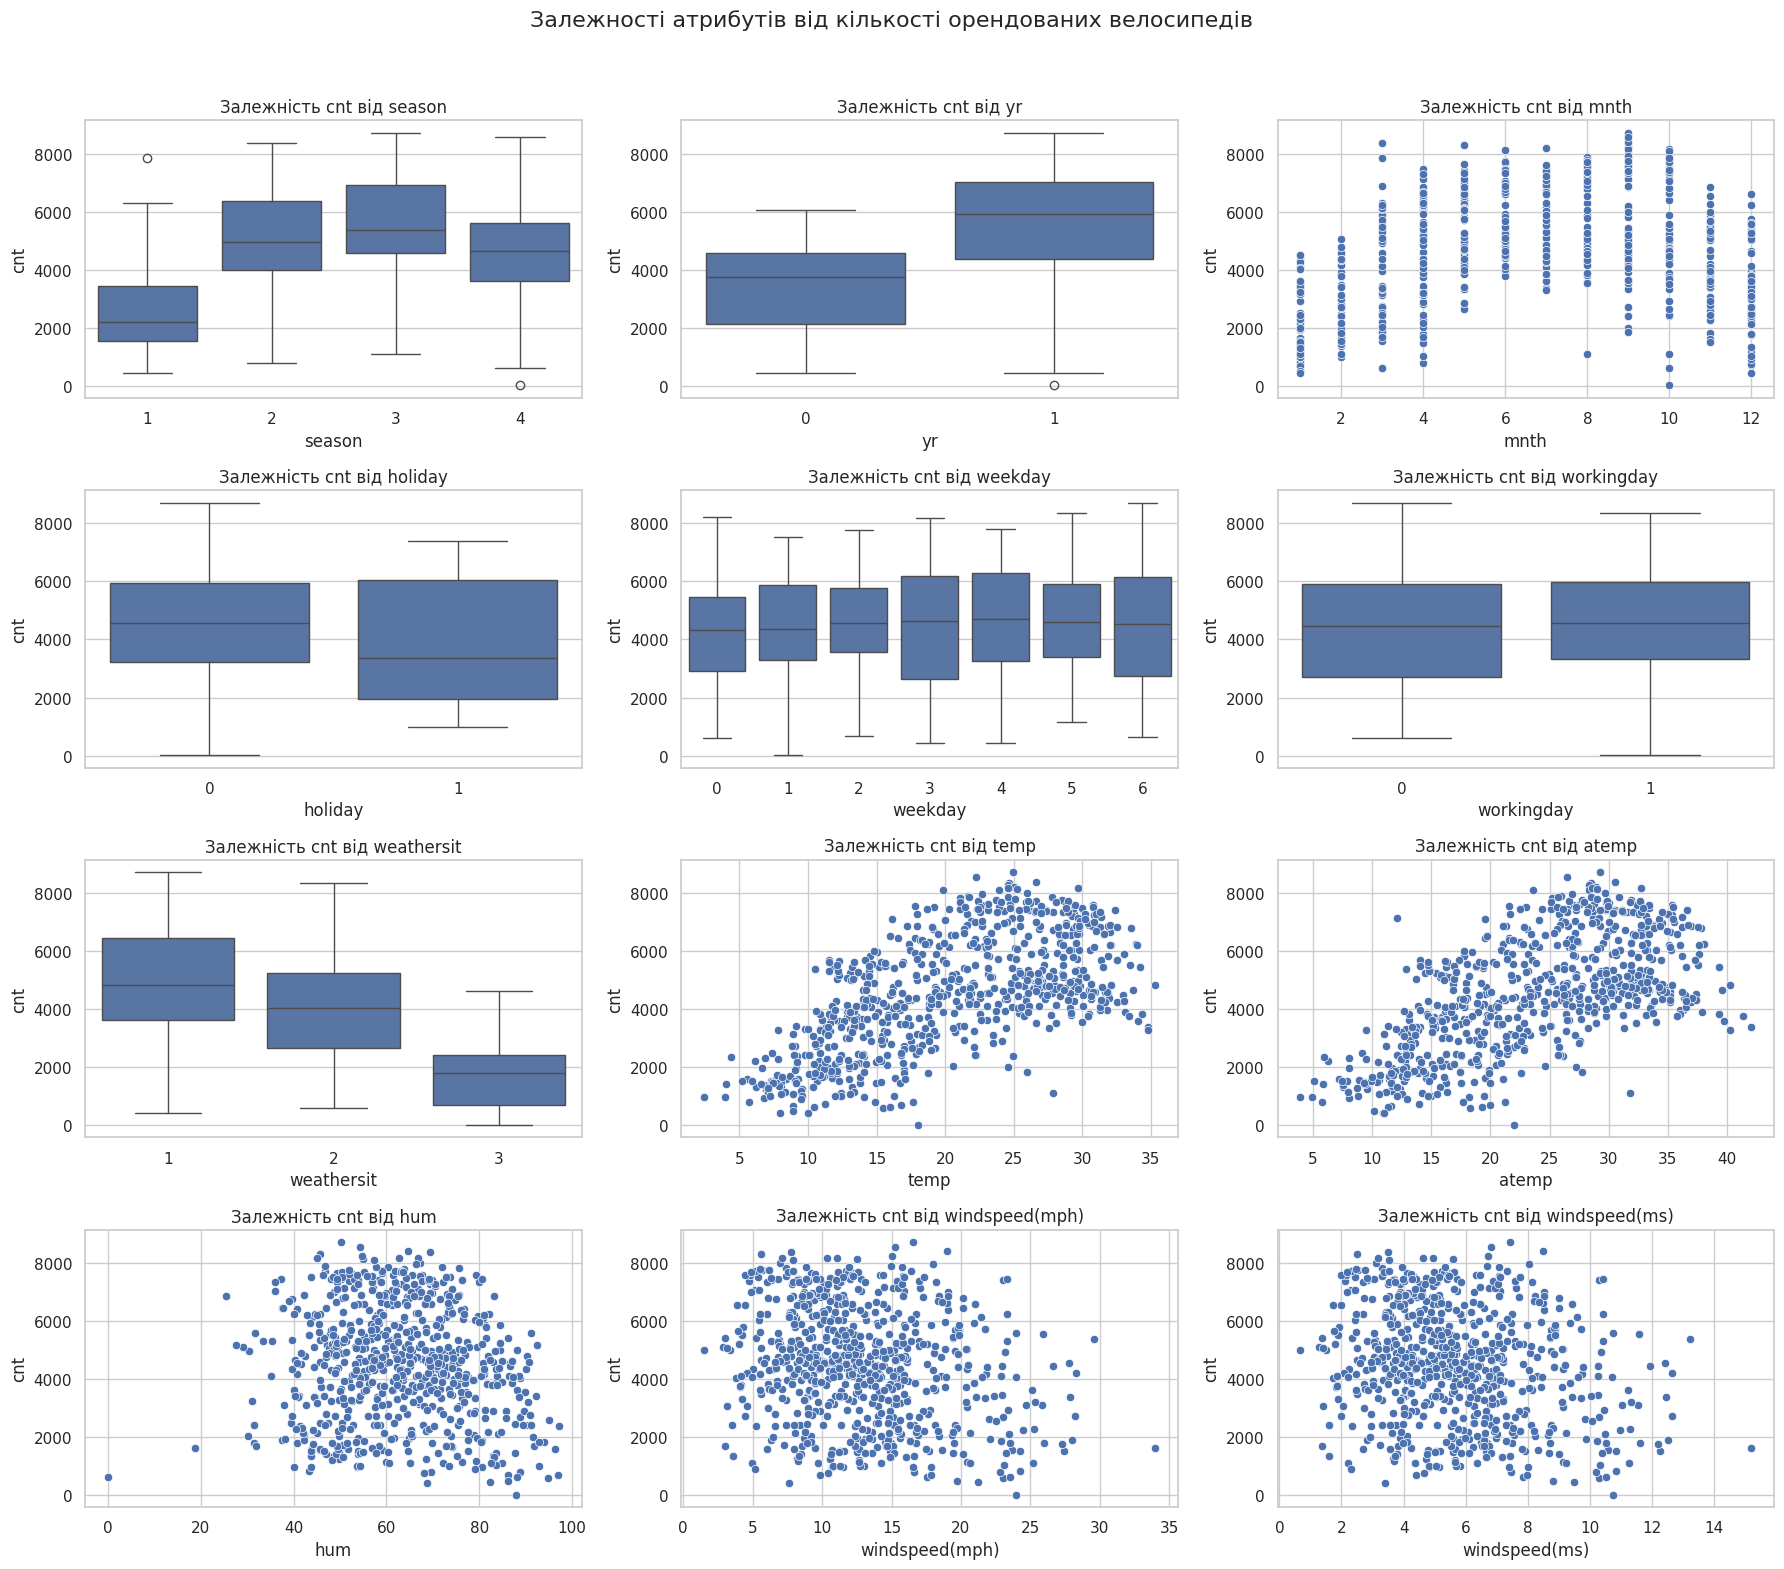

In [6]:
# Put you code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приклад завантаження датасету (необхідно замінити на ваш шлях до файлу або інші дані)
# df = pd.read_csv('your_dataset.csv')

# Налаштування стилю для графіків
sns.set(style="whitegrid")

# Створення фігури та осей для графіків
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Залежності атрибутів від кількості орендованих велосипедів', fontsize=16)

# Список атрибутів для графіків
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Побудова графіків
for idx, attribute in enumerate(attributes):
    ax = axes[idx // 3, idx % 3]
    if df[attribute].dtype == 'object' or len(df[attribute].unique()) < 10:
        sns.boxplot(x=attribute, y='cnt', data=df, ax=ax)
    else:
        sns.scatterplot(x=attribute, y='cnt', data=df, ax=ax)
    ax.set_title(f'Залежність cnt від {attribute}')

# Налаштування відображення графіків
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


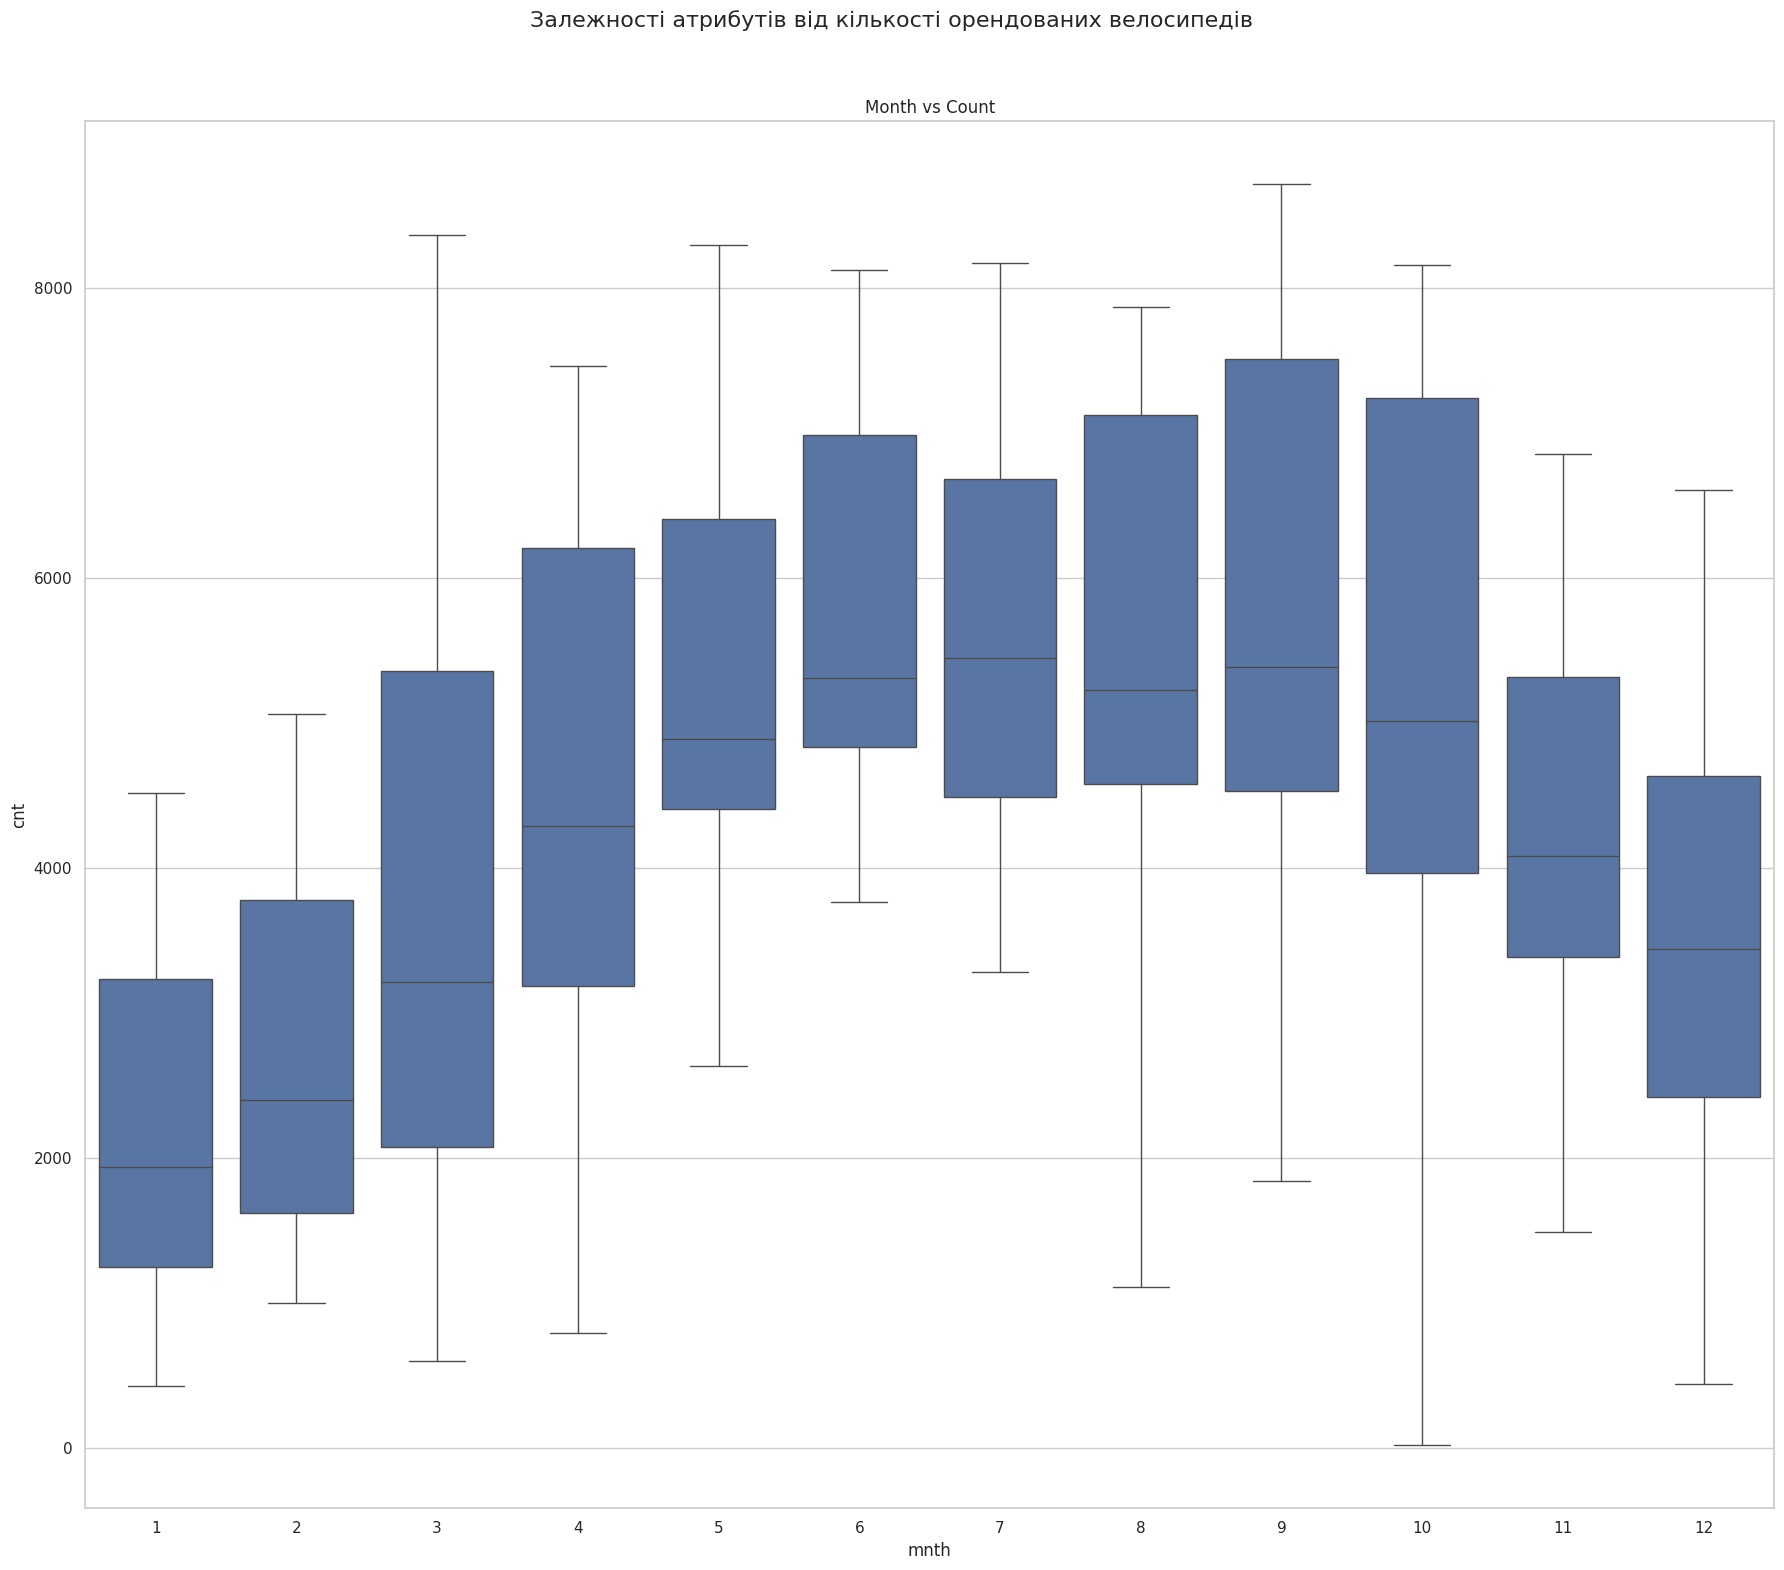

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приклад завантаження датасету
# df = pd.read_csv('your_dataset.csv')

# Налаштування стилю для графіків
sns.set(style="whitegrid")

# Створення фігури та осей для графіків
#fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig, axes = plt.subplots(1, 1, figsize=(18, 16))
fig.suptitle('Залежності атрибутів від кількості орендованих велосипедів', fontsize=16)

# axes
# import numpy as np

# # Припустимо, що `axes` - це масив NumPy
# axes_array = np.array(axes)

# # Розмірність масиву
# shape = axes_array.shape
# shape
#print(f'Number of rows: {shape[0]}, Number of columns: {shape[1]}')
sns.boxplot(x='mnth', y='cnt', data=df, ax=axes)
axes.set_title('Month vs Count')

# # Налаштування відображення графіків
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

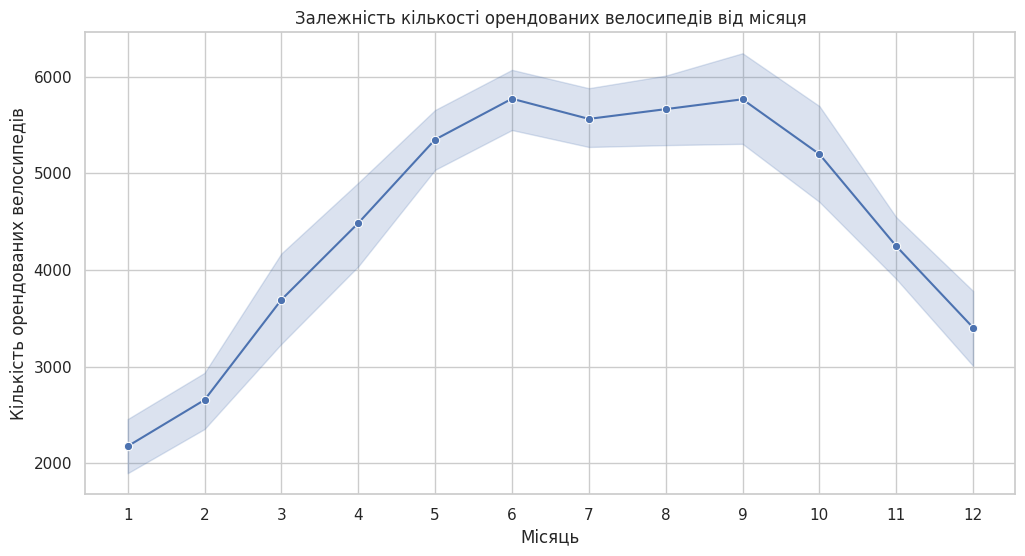

In [9]:
# Налаштування стилю для графіків
sns.set(style="whitegrid")

# Побудова лінійної діаграми залежності 'Month vs Count'
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=df, marker='o')
plt.title('Залежність кількості орендованих велосипедів від місяця')
plt.xlabel('Місяць')
plt.ylabel('Кількість орендованих велосипедів')
plt.xticks(range(1, 13))  # Відображення всіх місяців на осі X
plt.grid(True)
plt.show()

In [10]:
df['atemp'].min(), df['atemp'].max()

(3.95348, 42.0448)

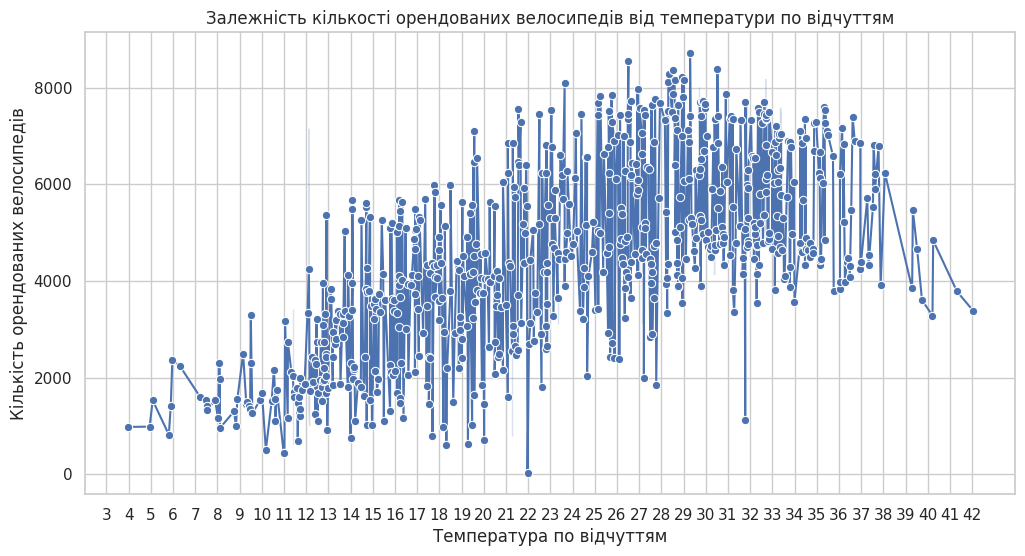

In [11]:
# Налаштування стилю для графіків
sns.set(style="whitegrid")

# Побудова лінійної діаграми залежності 'Month vs Count'
plt.figure(figsize=(12, 6))
sns.lineplot(x='atemp', y='cnt', data=df, marker='o')
plt.title('Залежність кількості орендованих велосипедів від температури по відчуттям')
plt.xlabel('Температура по відчуттям')
plt.ylabel('Кількість орендованих велосипедів')
plt.xticks(range(3, 43))  # Відображення всіх температур на осі X
plt.grid(True)
plt.show()

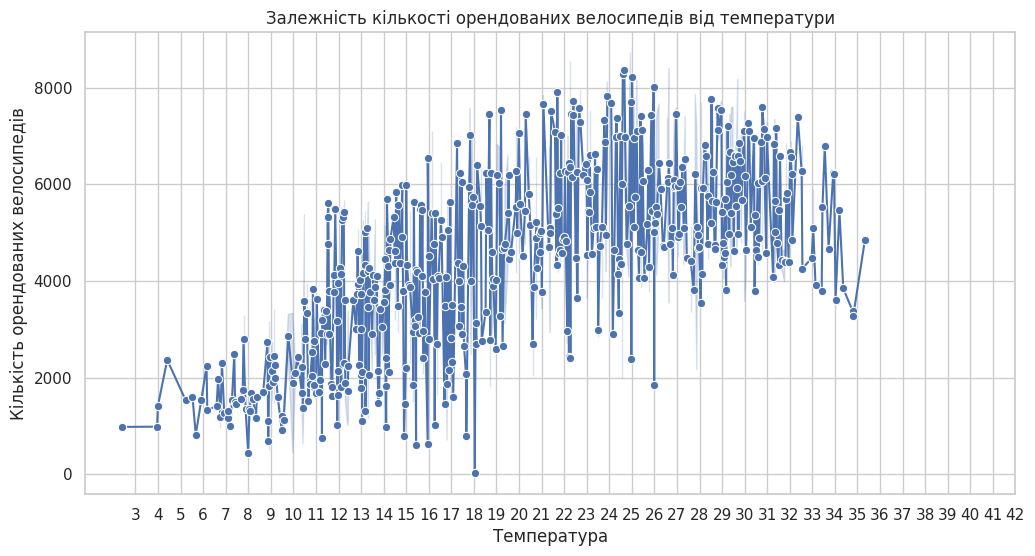

In [12]:
# Налаштування стилю для графіків
sns.set(style="whitegrid")

# Побудова лінійної діаграми залежності 'Month vs Count'
plt.figure(figsize=(12, 6))
sns.lineplot(x='temp', y='cnt', data=df, marker='o')
plt.title('Залежність кількості орендованих велосипедів від температури')
plt.xlabel('Температура')
plt.ylabel('Кількість орендованих велосипедів')
plt.xticks(range(3, 43))  # Відображення всіх температур на осі X
plt.grid(True)
plt.show()

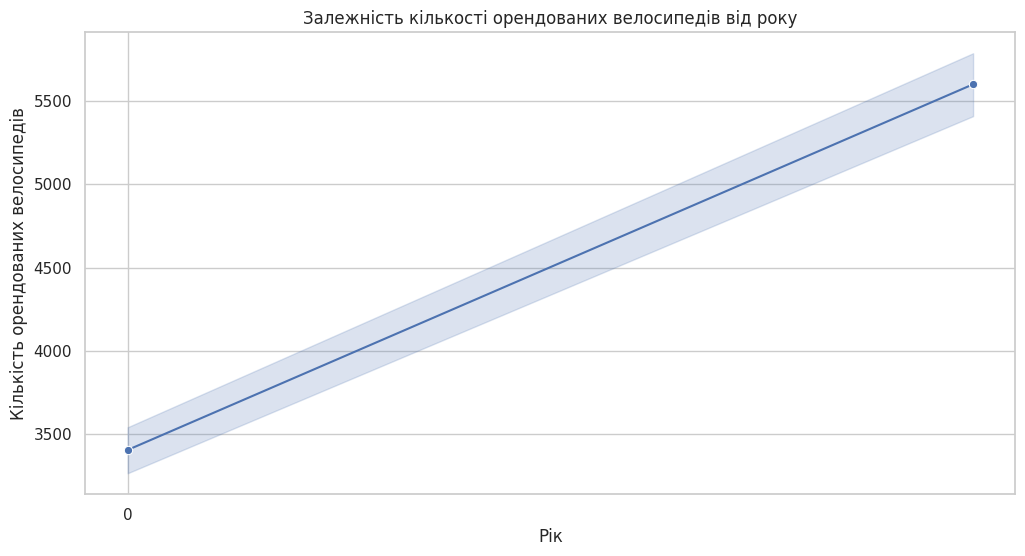

In [13]:
# Налаштування стилю для графіків
sns.set(style="whitegrid")

# Побудова лінійної діаграми залежності 'Month vs Count'
plt.figure(figsize=(12, 6))
sns.lineplot(x='yr', y='cnt', data=df, marker='o')
plt.title('Залежність кількості орендованих велосипедів від року')
plt.xlabel('Рік')
plt.ylabel('Кількість орендованих велосипедів')
plt.xticks(range(0, 1))  # Відображення всіх температур на осі X
plt.grid(True)
plt.show()

### Кореляційний аналіз

Коефіцієнт кореляції Пірсона дозволяє оцінити силу та напрямок лінійної залежності між числовими змінними. Ось код для обчислення кореляційної матриці:

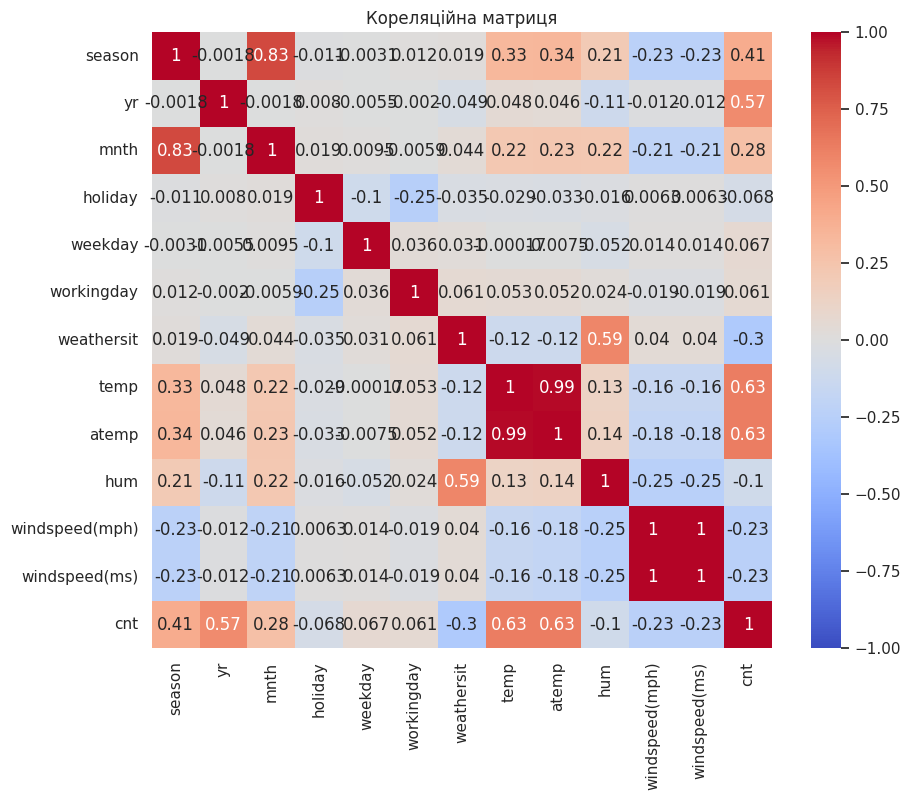

cnt               1.000000
atemp             0.631066
temp              0.627494
yr                0.566710
season            0.406100
mnth              0.279977
weekday           0.067443
workingday        0.061156
holiday          -0.068348
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
weathersit       -0.297391
Name: cnt, dtype: float64


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Приклад завантаження датасету
# df = pd.read_csv('your_dataset.csv')

# Обчислення кореляційної матриці
correlation_matrix = df.corr()

# Візуалізація кореляційної матриці за допомогою heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Кореляційна матриця')
plt.show()

# Виведення кореляційних значень для цільової змінної 'cnt'
print(correlation_matrix['cnt'].sort_values(ascending=False))

### Візуалізація розсіювання

Після того як ви визначили ознаки з високою кореляцією, можна побудувати розсіювальні діаграми для візуального підтвердження лінійної залежності:

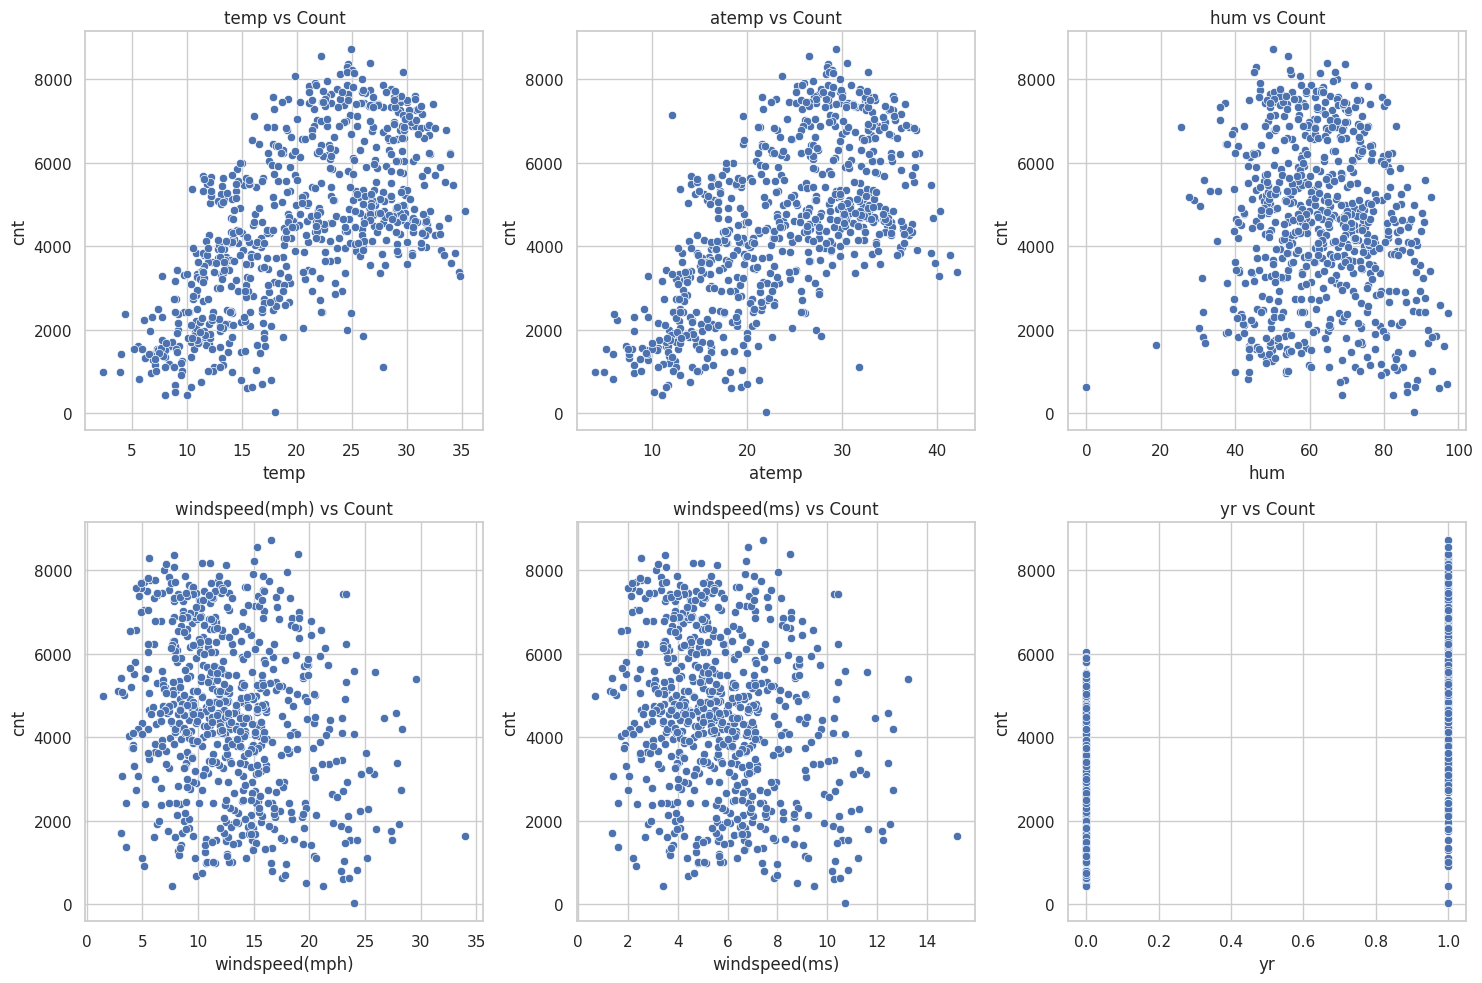

In [15]:
# Побудова розсіювальних діаграм для ознак з високою кореляцією
high_correlation_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'yr']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(high_correlation_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='cnt', data=df)
    plt.title(f'{feature} vs Count')

plt.tight_layout()
plt.show()

In [16]:
correlation_matrix = df.corr()
print(correlation_matrix['cnt'].sort_values(ascending=False))

cnt               1.000000
atemp             0.631066
temp              0.627494
yr                0.566710
season            0.406100
mnth              0.279977
weekday           0.067443
workingday        0.061156
holiday          -0.068348
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
weathersit       -0.297391
Name: cnt, dtype: float64


### Аналіз результатів кореляційної матриці

- Значення ближче до 1 або -1 вказують на сильну лінійну залежність.
- Значення ближче до 0 вказують на відсутність лінійної залежності.

__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця?
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.

__Відповіді:__
1. НеЛінійним. Кореляція 0.279977.
2. Скоріше за все, це ознаки 'temp', 'atemp', 'yr', проте вони мають низький рівень кореляції (0.631066, 0.627494, 0.566710 відповідно) (мало наближені до +-1), а тому там також не лінійна залежність.

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [17]:
# Обчислення кореляції між ознаками та цільовою змінною
correlations = df.corrwith(df['cnt'])

# Відображення результатів
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64


У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

In [18]:
# Вибір потрібних стовпців
selected_columns = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
data_selected = df[selected_columns]

# Обчислення попарних кореляцій
correlation_matrix = data_selected.corr()

# Відображення результатів
print(correlation_matrix)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [19]:
# Обчислення середніх значень ознак
mean_values = df.mean()

# Відображення результатів
print(mean_values)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [20]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [21]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [22]:
X

array([[ 1.354375  ,  0.99863295,  1.58866019, ...,  0.74372737,
        -0.21121111, -0.21121111],
       [-1.34821315, -1.00136893, -1.31026791, ..., -1.33538868,
         1.12681211,  1.12681211],
       [ 1.354375  , -1.00136893,  1.00887457, ..., -0.29551449,
         0.50349108,  0.50349108],
       ...,
       [ 1.354375  , -1.00136893,  0.71898176, ...,  1.55169951,
        -0.5404777 , -0.5404777 ],
       [-1.34821315,  0.99863295, -1.0203751 , ..., -1.06046036,
         0.41449871,  0.41449871],
       [-0.44735043, -1.00136893, -0.73048229, ...,  1.34385394,
         0.77643372,  0.77643372]])

In [23]:
y

703    6606
33     1550
300    3747
456    6041
633    7538
       ... 
71     2417
106    3744
270    3907
435    4911
102    2162
Name: cnt, Length: 731, dtype: int64

In [24]:
data = pd.read_csv(PATH_TO_BIKES)
# Масштабування ознак
features = data.drop(columns=['cnt'])  # Всі колонки, окрім цільової
target = data['cnt']
# Масштабування ознак (віднімання середнього і ділення на стандартне відхилення)
scaled_features = pd.DataFrame(scale(features), columns=features.columns)

# Об'єднання масштабованих ознак з цільовою змінною
scaled_data = pd.concat([scaled_features, target], axis=1)

# Перемішування вибірки
shuffled_data = shuffle(scaled_data, random_state=42)

# Відображення перших кількох рядків перемішаного датасету
print(shuffled_data.head())

       season        yr      mnth   holiday   weekday  workingday  weathersit  \
703  1.354375  0.998633  1.588660 -0.171981 -0.497782    0.679706   -0.726048   
33  -1.348213 -1.001369 -1.310268 -0.171981  0.500513    0.679706   -0.726048   
300  1.354375 -1.001369  1.008875 -0.171981  0.999661    0.679706    1.110427   
456 -0.447350  0.998633 -0.730482 -0.171981 -1.496077   -1.471225    1.110427   
633  1.354375  0.998633  0.718982 -0.171981 -0.497782    0.679706   -0.726048   

         temp     atemp       hum  windspeed(mph)  windspeed(ms)   cnt  
703 -0.106884 -0.032545  0.743727       -0.211211      -0.211211  6606  
33  -1.686082 -1.820550 -1.335389        1.126812       1.126812  1550  
300 -0.899555 -0.955126 -0.295514        0.503491       0.503491  3747  
456 -0.380219 -0.350427  0.339741       -0.235254      -0.235254  6041  
633  0.298565  0.428770 -0.406755        0.591838       0.591838  7538  


Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# Поділ на ознаки та цільову змінну після перемішування
X1 = shuffled_data.drop(columns=['cnt'])
y1 = shuffled_data['cnt']


In [27]:
type(X1)

pandas.core.frame.DataFrame

In [28]:

# Навчання лінійної регресії
model = LinearRegression()
model.fit(X1, y1)

# Виведення ваг ознак
weights = pd.Series(model.coef_, index=X1.columns)

print("Ваги ознак:\n", weights)

Ваги ознак:
 season            5.708633e+02
yr                1.021971e+03
mnth             -1.413013e+02
holiday          -8.675837e+01
weekday           1.372228e+02
workingday        5.639237e+01
weathersit       -3.302281e+02
temp              3.674588e+02
atemp             5.855745e+02
hum              -1.456130e+02
windspeed(mph)    1.245889e+13
windspeed(ms)    -1.245889e+13
dtype: float64


## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [29]:
# Отримання ваг ознак
weights = model.coef_

# Виведення пар (назва ознаки, вага)
feature_names = X1.columns
for feature, weight in zip(feature_names, weights):
    print(f'{feature}: {weight}')

season: 570.8632625058385
yr: 1021.9711030964785
mnth: -141.301256426666
holiday: -86.75836658628833
weekday: 137.2227897007185
workingday: 56.39237369379291
weathersit: -330.2280953180767
temp: 367.45880414782164
atemp: 585.5745292737066
hum: -145.61300017573424
windspeed(mph): 12458894786566.92
windspeed(ms): -12458894786765.377


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [30]:
from sklearn.linear_model import Lasso
# Навчання лінійної моделі з L1-регуляризацією
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X1, y1)

# Отримання ваг ознак
lasso_weights = lasso_model.coef_

# Виведення пар (назва ознаки, вага)
feature_names = X1.columns
for feature, weight in zip(feature_names, lasso_weights):
    print(f'{feature}: {weight}')

season: 560.2416160308866
yr: 1019.4634940657196
mnth: -128.73062703678727
holiday: -86.15278133371092
weekday: 137.34789390496329
workingday: 55.212370641356735
weathersit: -332.36985696234865
temp: 376.36323620969347
atemp: 576.5307935045562
hum: -144.12915500348615
windspeed(mph): -197.13968940248412
windspeed(ms): -2.8051522224997003e-08


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

In [31]:
from sklearn.linear_model import Ridge
# Навчання лінійної моделі з L2-регуляризацією
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1, y1)

# Отримання ваг ознак
ridge_weights = ridge_model.coef_

# Виведення пар (назва ознаки, вага)
feature_names = X1.columns
for feature, weight in zip(feature_names, ridge_weights):
    print(f'{feature}: {weight}')

season: 563.0645722520181
yr: 1018.9483787875305
mnth: -131.8733202824772
holiday: -86.74609799709232
weekday: 138.00511117871918
workingday: 55.90311037506467
weathersit: -332.3497884990736
temp: 386.45788919190824
atemp: 566.3470470600668
hum: -145.07132729867206
windspeed(mph): -99.25944108180201
windspeed(ms): -99.25944115433046


### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [32]:
alphas = np.arange(1, 500, 50)

# Створюємо списки для зберігання ваг для кожного alpha
coefs_lasso = []
coefs_ridge = []

# Навчаємо моделі для кожного значення alpha
for alpha in alphas:
    # Lasso регуляризація
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X1, y1)
    coefs_lasso.append(lasso_model.coef_)

    # Ridge регуляризація
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X1, y1)
    coefs_ridge.append(ridge_model.coef_)

# Конвертуємо списки в масиви NumPy
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

# Виведення розмірності отриманих масивів
print("Shape of coefs_lasso:", coefs_lasso.shape)
print("Shape of coefs_ridge:", coefs_ridge.shape)

Shape of coefs_lasso: (10, 12)
Shape of coefs_ridge: (10, 12)


Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

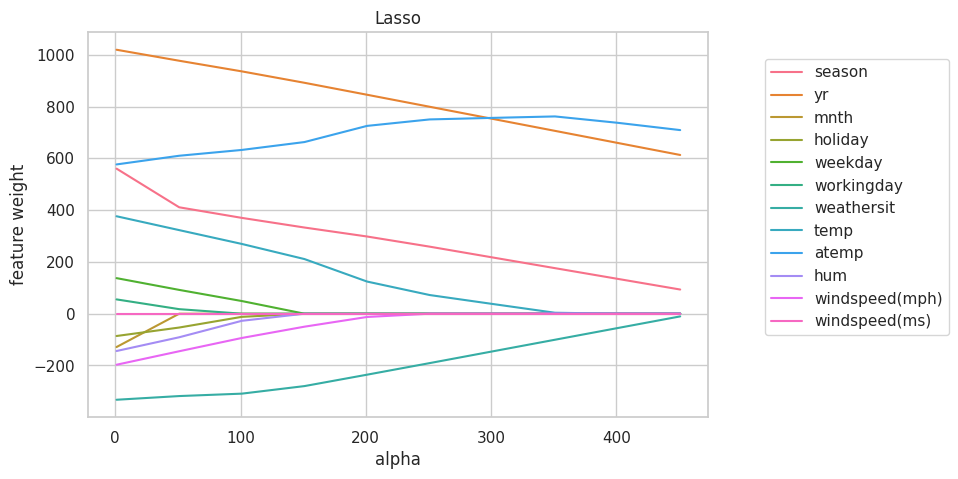

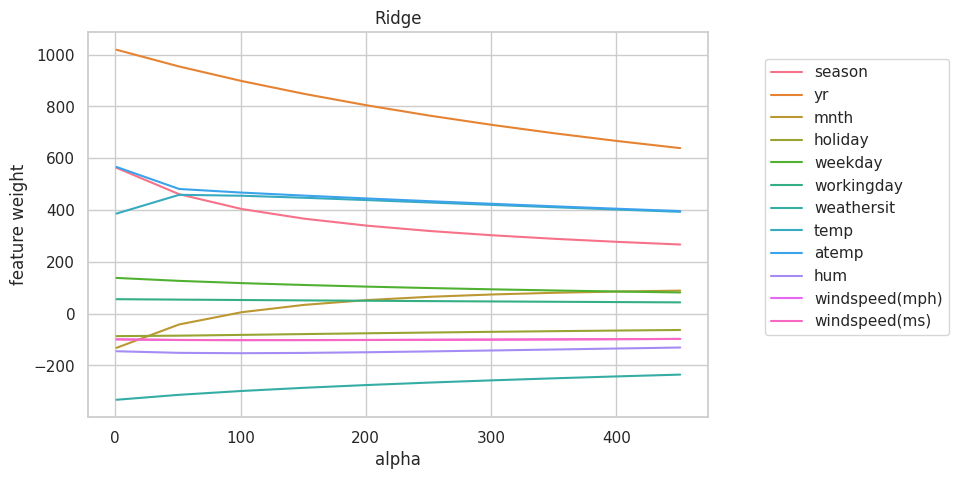

In [33]:
plt.figure(figsize=(8, 5))

#color_cycle = plt.cm.tab10(np.linspace(0, 1, len(df.columns)))
palette = sns.color_palette("husl", len(df.columns[:-1]))

for coef, feature, color in zip(coefs_lasso.T, df.columns, palette):
    #plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
    plt.plot(alphas, coef, label=feature, color=color)

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
palette = sns.color_palette("husl", len(df.columns[:-1]))
for coef, feature, color in zip(coefs_ridge.T, df.columns, palette):
    #plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
    plt.plot(alphas, coef, label=feature, color=color)

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

# Відповіді
1. Lasso агресивніше зменшує ваги при одному і тому самому alpha.
2. Ваги Lasso зануляються при великих значеннях ваг. При великих значеннях 𝛼, штрафний термін стає значним і модель прагне мінімізувати не тільки RSS, але і суму абсолютних значень коефіцієнтів. Оскільки α збільшується, модель більш жорстко карає великі коефіцієнти, змушуючи деякі з них стати точно нульовими, щоб мінімізувати загальну втрату. Це приводить до обнулення ваг при великих значеннях α.
3. Можна стверджувати, що Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0. А Ridge не виключає.
4. L1 підійде для відбору неінформативних ознак.

In [34]:
# Виведення коефіцієнтів моделі
coefs_lasso1 = pd.Series(lasso_model.coef_, index=X1.columns)

# Відбір неінформативних ознак (з нульовими вагами)
non_informative_features = coefs_lasso1[coefs_lasso1 == 0].index.tolist()
print("Неінформативні ознаки:", non_informative_features)

Неінформативні ознаки: ['mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed(mph)', 'windspeed(ms)']


### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [35]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    # x = map(lambda e: e[0], data)
    # y = map(lambda e: e[1], data)

    # Перетворення даних на списки
    x = [e[0] for e in data]
    y = [e[1] for e in data]

    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

In [36]:
# from sklearn.linear_model import LassoCV

# alphas = np.arange(1, 100, 5)

# regressor = # Put your code here

Вибране alpha: 6
Коефіцієнти моделі:
season            5.439432e+02
yr                1.006064e+03
mnth             -9.350407e+01
holiday          -6.224924e+01
weekday           1.407664e+02
workingday        7.038133e+01
weathersit       -3.427842e+02
temp              3.821174e+02
atemp             5.685964e+02
hum              -1.182665e+02
windspeed(mph)   -1.544234e+02
windspeed(ms)    -2.266592e-08
dtype: float64


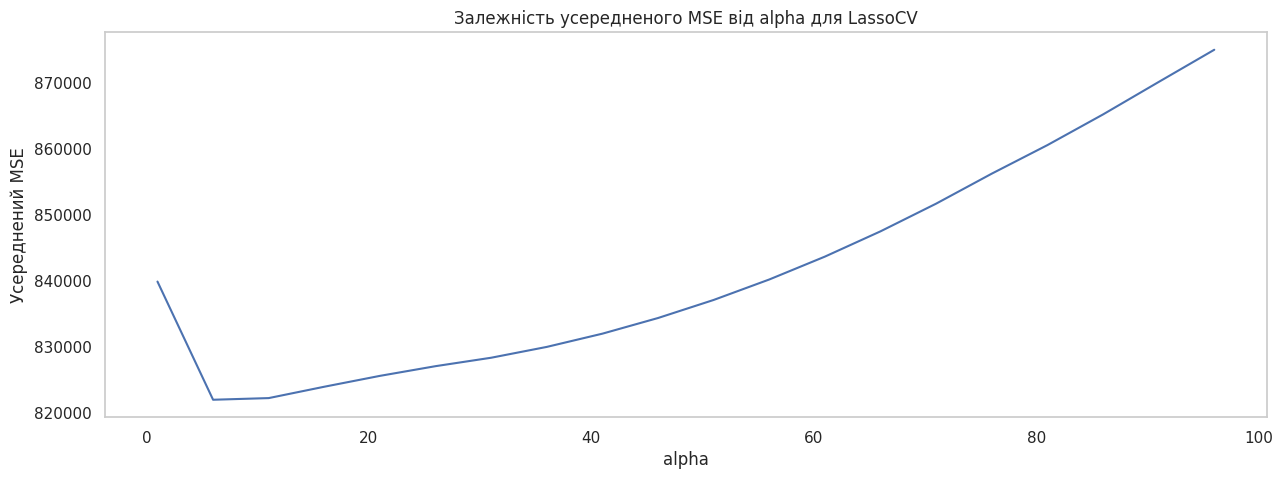

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Завантаження даних
data = pd.read_csv(PATH_TO_BIKES)

# Поділ на ознаки та цільову змінну
X = data.drop(columns=['cnt'])
y = data['cnt']

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поділ на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Навчання моделі LassoCV
#alphas = np.logspace(-3, 2, 50)  # Від 0.001 до 100, логарифмічний масштаб
alphas = np.arange(1, 100, 5)
#lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=42)
lasso_cv.fit(X_train, y_train)

# Вибране alpha
optimal_alpha = lasso_cv.alpha_
print(f"Вибране alpha: {optimal_alpha}")

# Коефіцієнти моделі
coefs = pd.Series(lasso_cv.coef_, index=X.columns)
print("Коефіцієнти моделі:")
print(coefs)

# Побудова графіку усередненого за рядками MSE в залежності від alpha
mse_path_mean = np.mean(lasso_cv.mse_path_, axis=1)

# Створення даних для графіку
plot_data = list(zip(lasso_cv.alphas_, mse_path_mean))

# Використання функції create_plot для побудови графіку
create_plot(
    plot_data,
    title='Залежність усередненого MSE від alpha для LassoCV',
    xlabel='alpha',
    ylabel='Усереднений MSE'
)

Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


Alpha, що відповідають мінімумам MSE на кожному розбитті: [91 91 51]


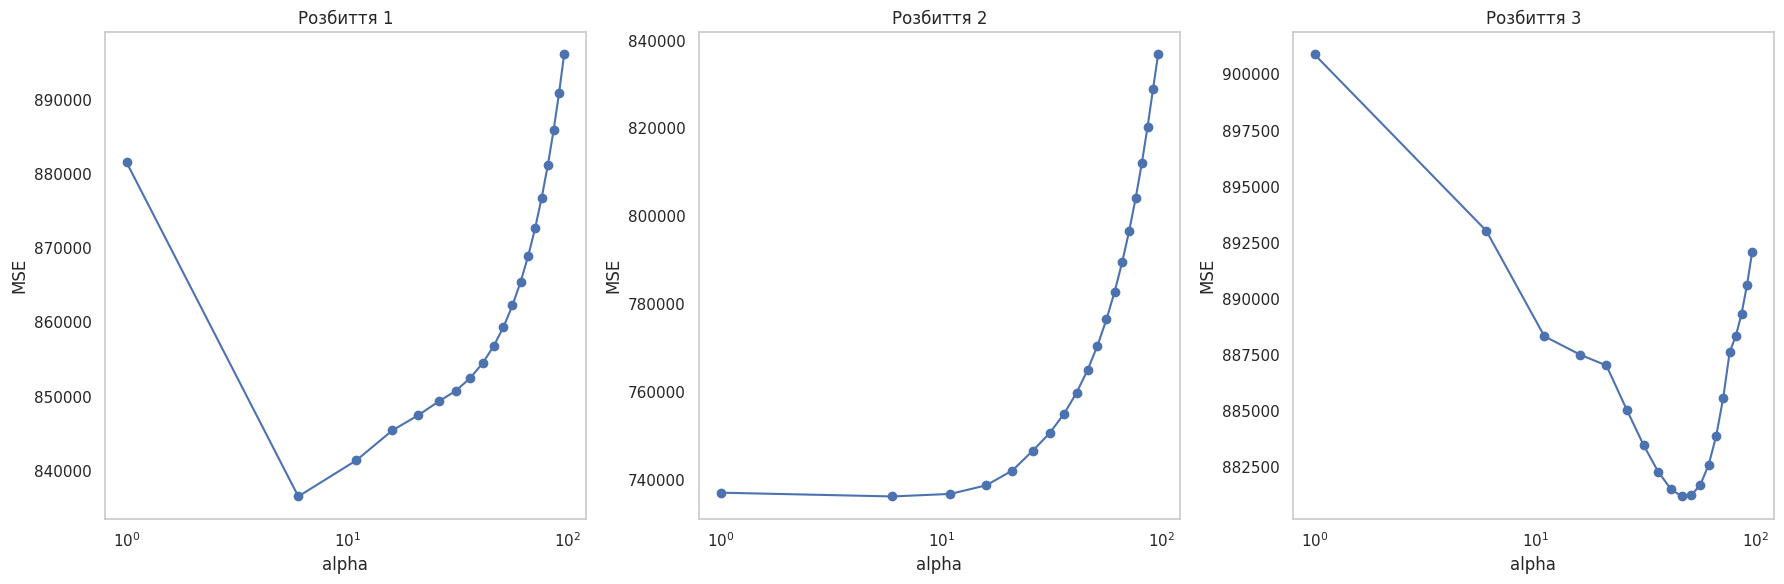

In [38]:
# Виведення значень alpha, що відповідають мінімумам MSE на кожному розбитті
mse_path = lasso_cv.mse_path_
alphas_min_mse = alphas[np.argmin(mse_path, axis=0)]
print("Alpha, що відповідають мінімумам MSE на кожному розбитті:", alphas_min_mse)

# Візуалізація MSE для кожного розбиття
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    axs[i].plot(lasso_cv.alphas_, mse_path[:, i], marker='o')
    axs[i].set_xscale('log')
    axs[i].set_title(f'Розбиття {i + 1}')
    axs[i].set_xlabel('alpha')
    axs[i].set_ylabel('MSE')
    axs[i].grid()

plt.tight_layout()
plt.show()

На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

__Відповідь:__

4 ознаки з найбільшими позитивними коефіцієнтами:
yr        1006.064355
atemp      568.596355
season     543.943246
temp       382.117441
dtype: float64


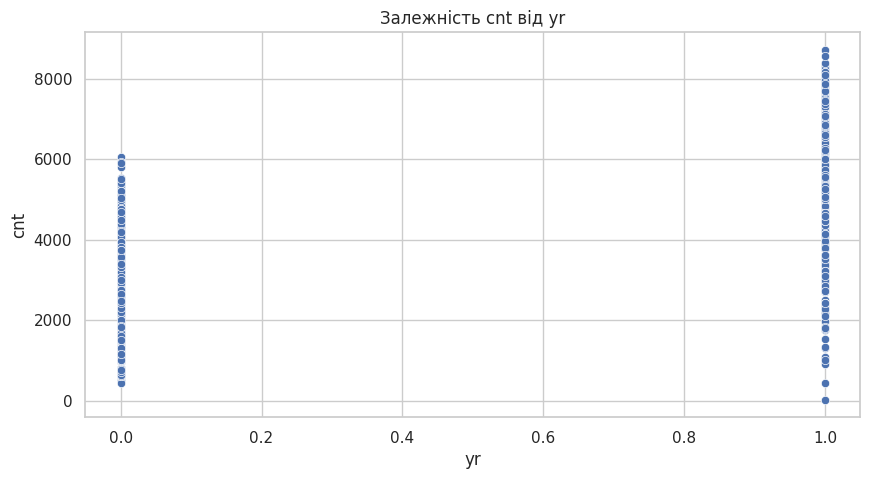

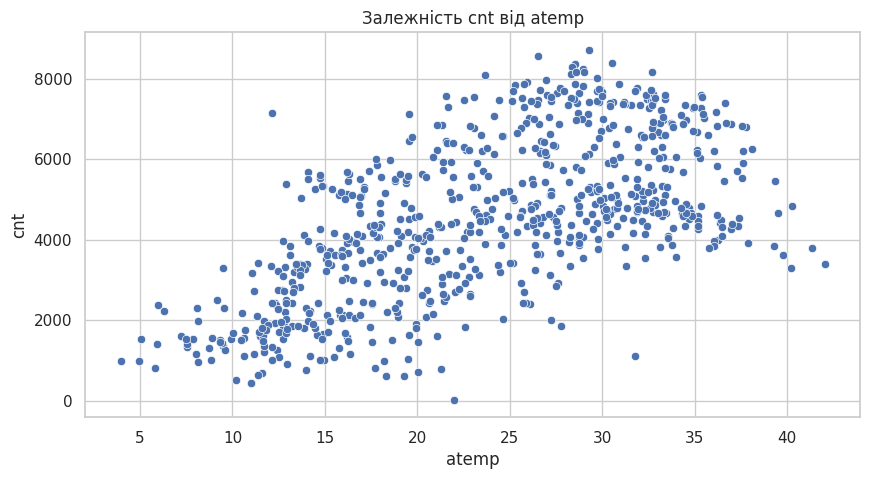

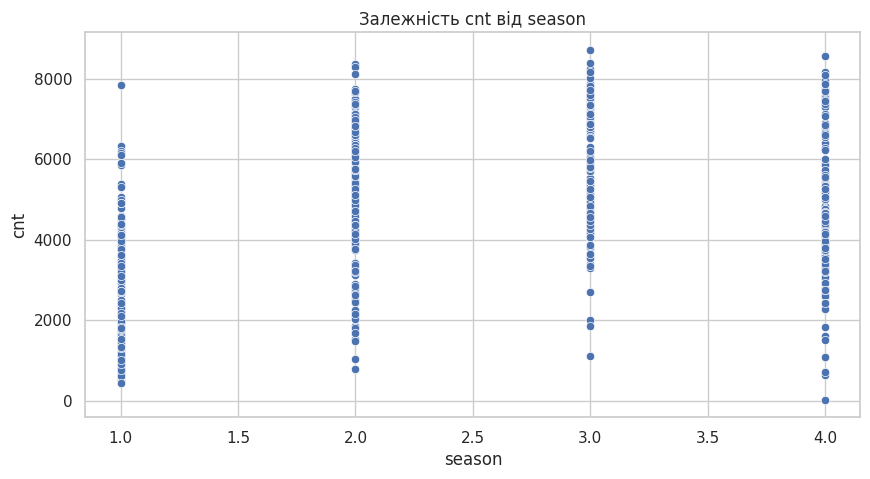

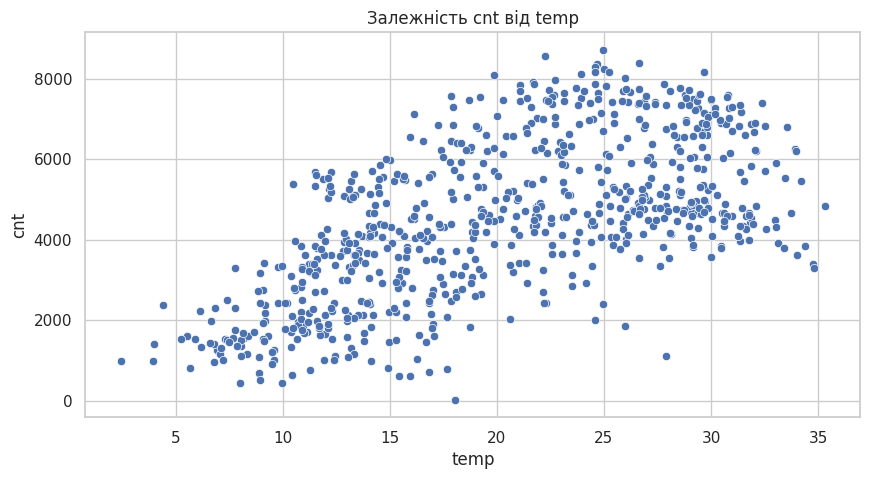

In [39]:
# Вибірка 4 ознак з найбільшими позитивними коефіцієнтами
top_features = coefs.nlargest(4)
print("4 ознаки з найбільшими позитивними коефіцієнтами:")
print(top_features)

# Візуалізація залежностей cnt від цих ознак
for feature in top_features.index:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[feature], y=data['cnt'])
    plt.title(f'Залежність cnt від {feature}')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.grid(True)
    plt.show()

Відповідь:
Навряд чи можна орієнтуватися на показник yr з точки зору здорового глузду. У нас тільки два роки, у другому році показник був вищим. Є залежність від temp та atemp, більше бажаючих взяти велосипеди напрокат при температурі від 25 до 30 градусів, а вище і нижче значення падають. Менше бажаючих брати велосипеди напрокат взимку.

#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

__Відповідь:__

3 ознаки з найбільшими за модулем негативними коефіцієнтами:
weathersit       -342.784158
windspeed(mph)   -154.423385
hum              -118.266503
dtype: float64


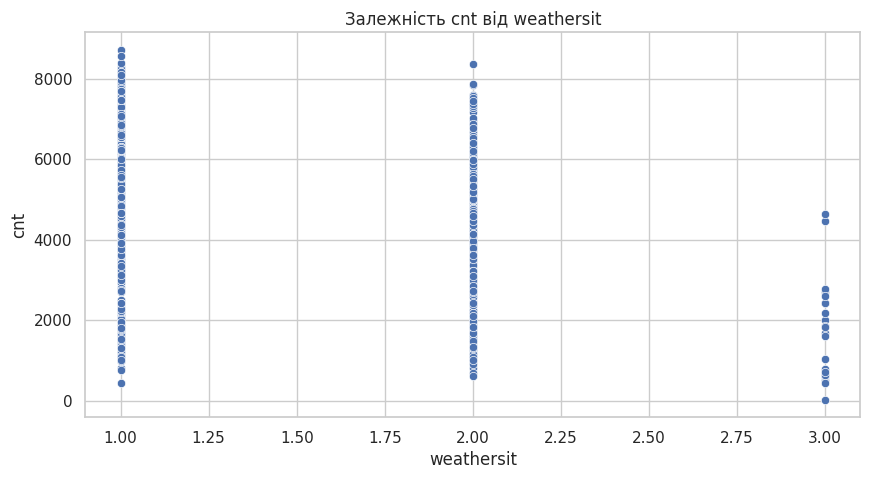

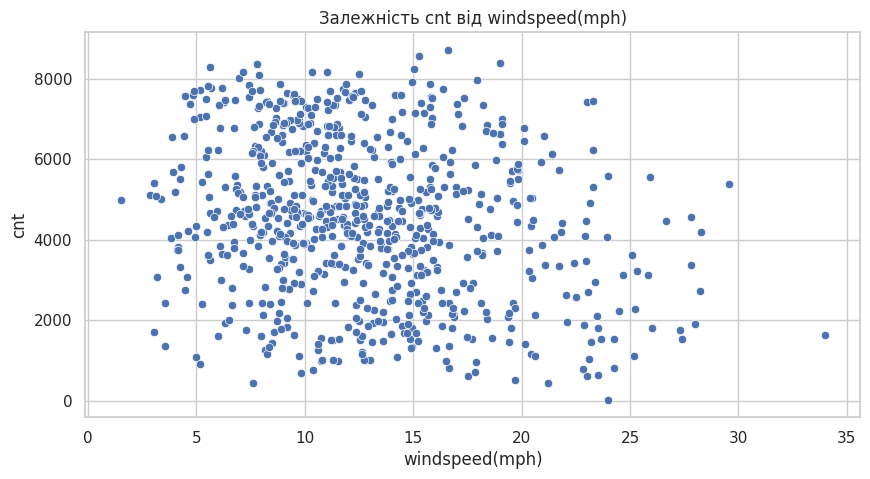

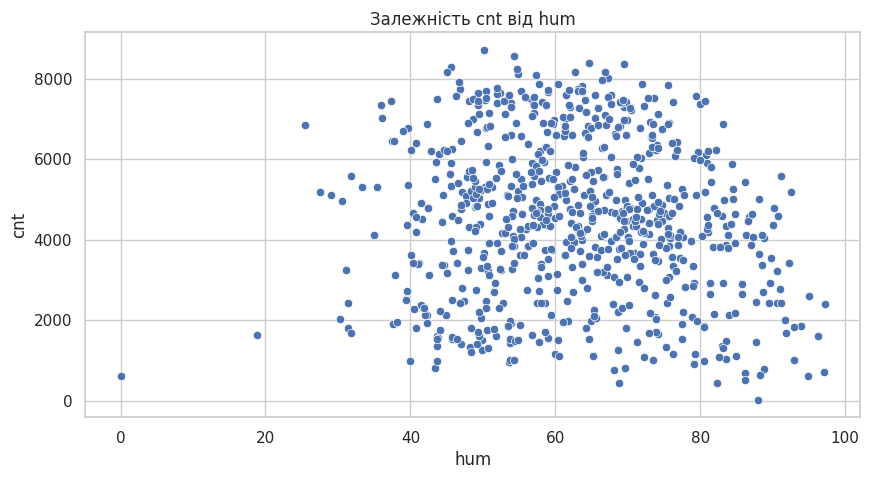

In [40]:
# Виділення 3 ознак з найбільшими за модулем негативними коефіцієнтами
negative_coefs = coefs[coefs < 0]
bottom_features = negative_coefs.nsmallest(3, keep='all')
print("3 ознаки з найбільшими за модулем негативними коефіцієнтами:")
print(bottom_features)

# Візуалізація залежностей cnt від цих ознак
for feature in bottom_features.index:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[feature], y=data['cnt'])
    plt.title(f'Залежність cnt від {feature}')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.grid(True)
    plt.show()

Ми бачимо, що залежність зменшується. Логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди.

#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

__Відповідь:__

Ознаки з коефіцієнтами, близькими до нуля:
windspeed(ms)   -2.266592e-08
dtype: float64


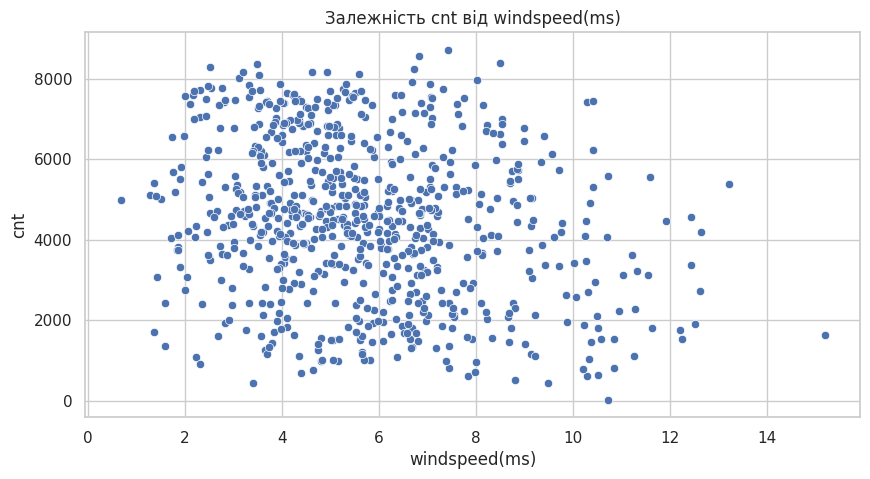

In [42]:
# Виділення ознак з коефіцієнтами, близькими до нуля
near_zero_coefs = coefs[np.abs(coefs) < 1e-3]
print("Ознаки з коефіцієнтами, близькими до нуля:")
print(near_zero_coefs)

# Візуалізація залежностей cnt від ознак з коефіцієнтами, близькими до нуля
for feature in near_zero_coefs.index:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[feature], y=data['cnt'])
    plt.title(f'Залежність cnt від {feature}')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.grid(True)
    plt.show()

Ознака windspeed(ms) могла бути виключена, тому що вона сильно корелює з windspeed(mph).

### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.